# First Set of Models.

# Training on First 9 Batches and Testing on 10th Batch.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,precision_recall_fscore_support as score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import scikitplot as skplt
import warnings
%matplotlib inline

# Reading the Dataset.

In [2]:
df_1 = pd.read_excel('batch1.xlsx', header=None)
df_2 = pd.read_excel('batch2.xlsx', header=None)
df_3 = pd.read_excel('batch3.xlsx', header=None)
df_4 = pd.read_excel('batch4.xlsx', header=None)
df_5 = pd.read_excel('batch5.xlsx', header=None)
df_6 = pd.read_excel('batch6.xlsx', header=None)
df_7 = pd.read_excel('batch7.xlsx', header=None)
df_8 = pd.read_excel('batch8.xlsx', header=None)
df_9 = pd.read_excel('batch9.xlsx', header=None)
df_10 = pd.read_excel('batch10.xlsx', header=None)

# Cleaning the Dataset.

In [3]:
# Take every 2nd column, starting with column 0.  These are the columns that contain the gas sensor data.
# The other columns just contain the gas sensor #s 1-128.

batch1_clean = df_1[df_1.columns[0::2]]
batch2_clean = df_2[df_2.columns[0::2]]
batch3_clean = df_3[df_3.columns[0::2]]
batch4_clean = df_4[df_4.columns[0::2]]
batch5_clean = df_5[df_5.columns[0::2]]
batch6_clean = df_6[df_6.columns[0::2]]
batch7_clean = df_7[df_7.columns[0::2]]
batch8_clean = df_8[df_8.columns[0::2]]
batch9_clean = df_9[df_9.columns[0::2]]
batch10_clean = df_10[df_10.columns[0::2]]

# Splitting the Dataset.

In [4]:
First_Model_Train = [batch1_clean, batch2_clean, batch3_clean, batch4_clean, batch5_clean,
                     batch6_clean, batch7_clean, batch8_clean, batch9_clean]

Train = pd.concat(First_Model_Train) # mearging first 9 batches for training.
Train = Train.reset_index()
Train = Train.drop(['index'], axis=1)

Test = batch10_clean 

X_train = Train[Train.columns[1:]] 
y_train = Train[Train.columns[0:1]]

X_test = Test[Test.columns[1:]]
y_test = Test[Test.columns[0:1]]

# Standardizing all the Features.

In [5]:
# Feature scaling.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression. 

# Using GridsearchCV to get the best Hyperparameters for Logistic Regression.

In [6]:
#takes about 4 minutes.
warnings.simplefilter('ignore') #hides the warnings.

log_clf = LogisticRegression(random_state = 42, multi_class = 'ovr') # Logistic Regression with multi class = ovr (one-vs-rest) 
log_reg_parameters = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']} # searching for the best solvers using
                                                                                    # gridsearchCV with 7 fold cross validation.

log_reg_gcv = GridSearchCV(estimator = log_clf,
                   param_grid = log_reg_parameters,
                   scoring = 'accuracy',
                   cv = 7,              # k-fold
                   n_jobs = -1,         # using all processors.
                   return_train_score=True)

log_reg_gcv = log_reg_gcv.fit(X_train, y_train)
gcv_log_reg_results = log_reg_gcv.cv_results_ # results from all the models.

log_reg_gcv_Train_accuracy = (log_reg_gcv.best_score_)*100 # Accuracy of the best model.
log_reg_gcv_Train_accuracy = round(log_reg_gcv_Train_accuracy,4)

log_reg_gcv_parameters = log_reg_gcv.best_params_ # Hyperparameters associated to the best model

print(f'Best Training Accuracy is {log_reg_gcv_Train_accuracy}% for {log_reg_gcv_parameters} as hyperparameter.')

Best Training Accuracy is 94.1125% for {'solver': 'newton-cg'} as hyperparameter.


In [8]:
log_reg_gcv_parameters

{'solver': 'newton-cg'}

# Getting the Test Accuracy for the Model with Best Hyperparameters for Logistic Regression.

In [16]:
                                     # takes the best parameters.  
log_clf = LogisticRegression(solver= log_reg_gcv_parameters['solver'], random_state=42, multi_class = 'ovr')
log_clf.fit(X_train, y_train)

log_reg_y_pred = log_clf.predict(X_test)

log_reg_Test_Accuracy = (accuracy_score(y_test, log_reg_y_pred))*100
log_reg_Test_Accuracy = round(log_reg_Test_Accuracy,4)

log_reg_Test_Error = 100 - log_reg_Test_Accuracy

print (f'Test Accuracy for the best model from GridsearchCV is {log_reg_Test_Accuracy}%.')

Test Accuracy for the best model from GridsearchCV is 74.0556%.


# Classification Report

In [17]:
print(classification_report(y_test, log_reg_y_pred, labels=[1, 2, 3, 4, 5, 6]))

              precision    recall  f1-score   support

           1       0.54      1.00      0.70       600
           2       0.87      0.85      0.86       600
           3       0.88      0.64      0.74       600
           4       0.76      0.39      0.51       600
           5       0.86      0.80      0.83       600
           6       0.76      0.76      0.76       600

   micro avg       0.74      0.74      0.74      3600
   macro avg       0.78      0.74      0.73      3600
weighted avg       0.78      0.74      0.73      3600



# Presision, Recall, Accuracy, Confusion Matrix and ROC Curve for Logistic Regression.

In [18]:
precision,recall,fscore,support = score(y_test, log_reg_y_pred, average = 'weighted')
print(f'Precision : {(round(precision,4))*100}% / Recall : {(round(recall,4))*100}% / Accuracy : {log_reg_Test_Accuracy}%')

Precision : 77.86% / Recall : 74.06% / Accuracy : 74.0556%


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, log_reg_y_pred)

array([[598,   0,   0,   0,   2,   0],
       [  1, 513,   1,  12,  73,   0],
       [135,  68, 384,   9,   3,   1],
       [280,   6,   0, 232,   0,  82],
       [  2,   0,  52,   1, 482,  63],
       [ 92,   0,   0,  51,   0, 457]], dtype=int64)

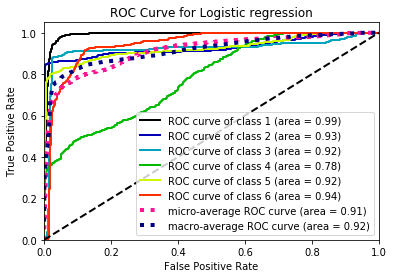

In [20]:
y_prob_dis = log_clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_prob_dis)
plt.title('ROC Curve for Logistic regression')
plt.show()

# Applying PCA to the Model with Best Hyperparameters for Logistic Regression.

In [21]:
warnings.simplefilter('ignore') #hides the warnings.

n_components = [1,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,80,84,88,92,96,100] # number of principar components
log_reg_PCA_Error_Array = [] 

for n in n_components:
    # PCA with n principal components 
    pca = PCA(n_components = n)
    
    # n principal components
    X_train_PCA_log_reg = pca.fit_transform(X_train)
    X_test_PCA_log_reg = pca.transform(X_test)
    
    # applying best bodel with n principal components
    log_clf_PCA = LogisticRegression(solver= log_reg_gcv_parameters['solver'], random_state=42, multi_class = 'ovr')
    log_clf_PCA.fit(X_train_PCA_log_reg, y_train)
    
    # predicting the class with n principal components
    y_pred_PCA_log_reg = log_clf_PCA.predict(X_test_PCA_log_reg)
    
    # Test Accuracy of the best gridsearchcv model with n principal components
    PCA_log_reg_Test_Accuracy = (accuracy_score(y_test, y_pred_PCA_log_reg))*100
    PCA_log_reg_Test_Accuracy = round(PCA_log_reg_Test_Accuracy,4)
    
    # Test Error of the best gridsearchcv model with n principal components
    PCA_log_reg_Test_Error = 100 - PCA_log_reg_Test_Accuracy
    PCA_log_reg_Test_Error = round(PCA_log_reg_Test_Error,4)
    log_reg_PCA_Error_Array.append(PCA_log_reg_Test_Error)
    
    # printing accuracy for n principal components.
    print(f'Test Accuracy of the Model with {n} Principal Components is {PCA_log_reg_Test_Accuracy}%.')

# gettint the index of the lowest error from the error array
idx = log_reg_PCA_Error_Array.index(min(log_reg_PCA_Error_Array))
print (f'Lowest Error is {min(log_reg_PCA_Error_Array)} % for {n_components[idx]} Principal Components.')

Test Accuracy of the Model with 1 Principal Components is 18.5%.
Test Accuracy of the Model with 4 Principal Components is 47.3056%.
Test Accuracy of the Model with 8 Principal Components is 63.4167%.
Test Accuracy of the Model with 12 Principal Components is 64.8056%.
Test Accuracy of the Model with 16 Principal Components is 68.1667%.
Test Accuracy of the Model with 20 Principal Components is 71.8611%.
Test Accuracy of the Model with 24 Principal Components is 70.6667%.
Test Accuracy of the Model with 28 Principal Components is 73.9722%.
Test Accuracy of the Model with 32 Principal Components is 69.75%.
Test Accuracy of the Model with 36 Principal Components is 70.0%.
Test Accuracy of the Model with 40 Principal Components is 70.0833%.
Test Accuracy of the Model with 44 Principal Components is 69.0%.
Test Accuracy of the Model with 48 Principal Components is 70.1111%.
Test Accuracy of the Model with 52 Principal Components is 70.4167%.
Test Accuracy of the Model with 56 Principal Com

# Plotting Number of Principal Components vr. Test Error for Logistic Regression.

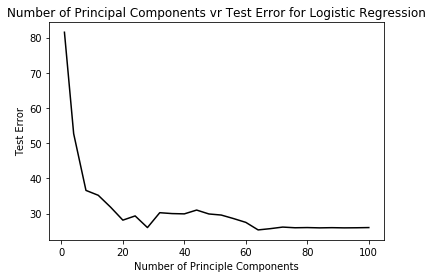

In [22]:
plt.plot(n_components, log_reg_PCA_Error_Array, color ="k")

plt.title('Number of Principal Components vr Test Error for Logistic Regression')
plt.xlabel('Number of Principle Components')
plt.ylabel('Test Error')
plt.show()

# Model with best Number of Principal Components and best Hyperparameters for Logistic Regression.

In [23]:
# PCA with best numbers of principal components. 
best_pca = PCA(n_components = n_components[idx])

# Transforming the features
X_train_Best_PCA_log_reg = best_pca.fit_transform(X_train)
X_test_Best_PCA_log_reg = best_pca.transform(X_test)

# applying best bodel with best numbers of principal components
log_clf_Best_PCA = LogisticRegression(solver= log_reg_gcv_parameters['solver'], random_state=42, multi_class = 'ovr')
log_clf_Best_PCA.fit(X_train_Best_PCA_log_reg, y_train)

# predivting the class with best numbers of principal components
y_pred_log_reg_Best_PCA = log_clf_Best_PCA.predict(X_test_Best_PCA_log_reg)

# Test Accuracy of the best gridsearchcv model with best numbers of principal components
Best_PCA_Test_Accuracy = (accuracy_score(y_test, y_pred_log_reg_Best_PCA))*100
Best_PCA_Test_Accuracy = round(Best_PCA_Test_Accuracy,4)

# Test Error of the best gridsearchcv model with best numbers of principal components
Best_PCA_Test_Error = 100 - Best_PCA_Test_Accuracy
Best_PCA_Test_Error = round(Best_PCA_Test_Error,4)

# printing accuracy for best numbers of principal components.
print(f'Test Accuracy of the Model with {n_components[idx]} Principal Components is {Best_PCA_Test_Accuracy}%.')

Test Accuracy of the Model with 64 Principal Components is 74.6111%.


# Classification Report

In [24]:
print(classification_report(y_test, y_pred_log_reg_Best_PCA, labels=[1, 2, 3, 4, 5, 6]))

              precision    recall  f1-score   support

           1       0.55      0.99      0.71       600
           2       0.86      0.85      0.85       600
           3       0.92      0.65      0.76       600
           4       0.80      0.37      0.51       600
           5       0.86      0.83      0.85       600
           6       0.74      0.77      0.76       600

   micro avg       0.75      0.75      0.75      3600
   macro avg       0.79      0.75      0.74      3600
weighted avg       0.79      0.75      0.74      3600



# Presision, Recall, Accuracy, Confusion Matrix and ROC Curve for the above model.

In [25]:
precision,recall,fscore,support = score(y_test, y_pred_log_reg_Best_PCA, average = 'weighted')

print(f'Precision : {(round(precision,4))*100}% / Recall : {(round(recall,4))*100}% / Accuracy : {Best_PCA_Test_Accuracy}%.')

Precision : 78.64999999999999% / Recall : 74.61% / Accuracy : 74.6111%.


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_log_reg_Best_PCA)

array([[596,   0,   0,   0,   4,   0],
       [  1, 512,   1,  11,  75,   0],
       [125,  77, 391,   3,   2,   2],
       [269,   9,   0, 222,   2,  98],
       [  1,   0,  33,   0, 501,  65],
       [ 94,   0,   0,  42,   0, 464]], dtype=int64)

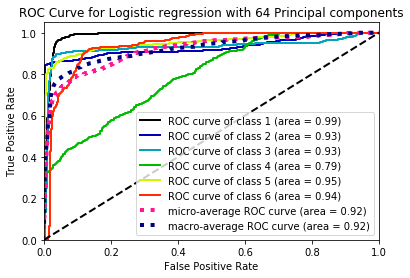

In [27]:
y_prob_dis = log_clf_Best_PCA.predict_proba(X_test_Best_PCA_log_reg)
skplt.metrics.plot_roc_curve(y_test, y_prob_dis)
plt.title(f'ROC Curve for Logistic regression with {n_components[idx]} Principal components')
plt.show()

# KNN.

# Using GridsearchCV to get the best Hyperparameters For KNN.

In [28]:
#took around 5 minutes.
warnings.simplefilter('ignore') #hides the warnings.

KNN = KNeighborsClassifier() # KNN classifier

KNN_parameters = {'algorithm': ['ball_tree', 'kd_tree', 'brute'], # searching for the best parameters using
                  'n_neighbors': [30,20],                         # gridsearchCV with 3 fold cross validation.
                  'weights': ['uniform','distance'],
                  'metric': ['minkowski','euclidean'] }                         
                                                                                    
gcv_KNN = GridSearchCV(estimator = KNN,
                       param_grid = KNN_parameters,
                       scoring = 'accuracy',
                       cv = 3,               # k-fold
                       n_jobs = -1,          # using all processors.
                       
                       return_train_score=True)

gcv_KNN = gcv_KNN.fit(X_train, y_train)
gcv_KNN_results = gcv_KNN.cv_results_ # results from all the models.

gcv_KNN_Train_Accuracy = (gcv_KNN.best_score_)*100 # Accuracy of the best model.
gcv_KNN_Train_Accuracy = round(gcv_KNN_Train_Accuracy,4)

gcv_KNN_parameters = gcv_KNN.best_params_ # Hyperparameters associated to the best model

print(f'Best Training Accuracy is {gcv_KNN_Train_Accuracy}% for {gcv_KNN_parameters} as hyperparameter.')

Best Training Accuracy is 86.5955% for {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 20, 'weights': 'distance'} as hyperparameter.


In [29]:
gcv_KNN_parameters

{'algorithm': 'ball_tree',
 'metric': 'minkowski',
 'n_neighbors': 20,
 'weights': 'distance'}

# Trying models with different numbers of neighbors with best Hyperparameters.

In [30]:
#takes about 2 minutes
warnings.simplefilter('ignore') #hides the warnings.

KNN_n_nbr_Error_array = []
n_neighbor = [500,400,300,200,100,90,80,70,60,50,40,30,20,10,5,4,3,2] # numbers of neighbors

for n in n_neighbor:
    # KNN with n neighbors
    KNN = KNeighborsClassifier(n_neighbors = n, algorithm = gcv_KNN_parameters['algorithm'],
                               weights = gcv_KNN_parameters['weights'], metric = gcv_KNN_parameters['metric'])
    
    KNN.fit(X_train, y_train)

    KNN_y_pred = KNN.predict(X_test)
    
    # Test Acurracy for n neighbors
    KNN_Test_Accuracy = (accuracy_score(y_test, KNN_y_pred))*100
    KNN_Test_Accuracy = round(KNN_Test_Accuracy,4)
    
    # Test Error for n neighbors
    KNN_Test_Error = 100 - KNN_Test_Accuracy
    KNN_Test_Error = round(KNN_Test_Error,4)
    KNN_n_nbr_Error_array.append(KNN_Test_Error)
    
    # printing accuracy for n neighbors
    print(f'Test Accuracy for {n} neighbors is {KNN_Test_Accuracy}%.')

# getting the index of the lowest error from the error array
idx_1 = KNN_n_nbr_Error_array.index(min(KNN_n_nbr_Error_array))
print (f'Lowest Error is {min(KNN_n_nbr_Error_array)}% for {n_neighbor[idx_1]} neighbors')

Test Accuracy for 500 neighbors is 57.25%.
Test Accuracy for 400 neighbors is 55.3611%.
Test Accuracy for 300 neighbors is 54.9167%.
Test Accuracy for 200 neighbors is 54.8611%.
Test Accuracy for 100 neighbors is 57.9722%.
Test Accuracy for 90 neighbors is 59.0833%.
Test Accuracy for 80 neighbors is 60.3611%.
Test Accuracy for 70 neighbors is 60.4444%.
Test Accuracy for 60 neighbors is 61.6389%.
Test Accuracy for 50 neighbors is 62.1111%.
Test Accuracy for 40 neighbors is 63.5833%.
Test Accuracy for 30 neighbors is 64.2222%.
Test Accuracy for 20 neighbors is 64.0%.
Test Accuracy for 10 neighbors is 62.4722%.
Test Accuracy for 5 neighbors is 62.1389%.
Test Accuracy for 4 neighbors is 62.1111%.
Test Accuracy for 3 neighbors is 62.3889%.
Test Accuracy for 2 neighbors is 62.6111%.
Lowest Error is 35.7778% for 30 neighbors


# Plotting Numbers of Neighbor vr. Test Error for KNN.

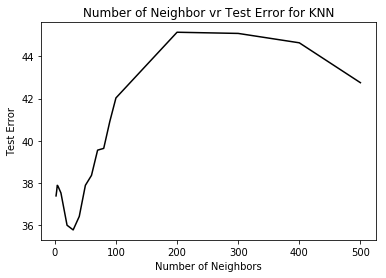

In [31]:
plt.plot(n_neighbor, KNN_n_nbr_Error_array, color ="k")

plt.title('Number of Neighbor vr Test Error for KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Error')
plt.show()

# Taking Best Hyperparameters and best Numbers of Neighbors for KNN.

In [32]:
# training again with the best number of neighbors
KNN_Best_n = KNeighborsClassifier(n_neighbors = n_neighbor[idx_1], algorithm = gcv_KNN_parameters['algorithm'],
                                  weights = gcv_KNN_parameters['weights'], metric = gcv_KNN_parameters['metric'])

KNN_Best_n.fit(X_train, y_train)

KNN_Best_n_y_pred = KNN_Best_n.predict(X_test)

# Test Accuracy for best numbers of neighbors
KNN_Best_n_Test_Accuracy = (accuracy_score(y_test, KNN_Best_n_y_pred))*100
KNN_Best_n_Test_Accuracy = round(KNN_Best_n_Test_Accuracy,4)

# Test Error for best numbers of neighbors
KNN_Best_n_Test_Error = 100 - KNN_Best_n_Test_Accuracy
KNN_Best_n_Test_Error = round(KNN_Best_n_Test_Error,4)

print (f'Test Accuracy for the best model from GridsearchCV and with best numbers of neighbors is {KNN_Best_n_Test_Accuracy}%..')

Test Accuracy for the best model from GridsearchCV and with best numbers of neighbors is 64.2222%..


# Classification Report

In [33]:
print(classification_report(y_test, KNN_Best_n_y_pred, labels=[1, 2, 3, 4, 5, 6]))

              precision    recall  f1-score   support

           1       0.51      0.21      0.30       600
           2       0.94      0.79      0.86       600
           3       1.00      0.84      0.91       600
           4       0.38      0.47      0.42       600
           5       0.63      0.79      0.70       600
           6       0.54      0.75      0.63       600

   micro avg       0.64      0.64      0.64      3600
   macro avg       0.66      0.64      0.64      3600
weighted avg       0.66      0.64      0.64      3600



# Presision, Recall, Accuracy, Confusion Matrix and ROC Curve for KNN.

In [34]:
precision,recall,fscore,support = score(y_test, KNN_Best_n_y_pred, average = 'weighted')
print(f'Precision : {(round(precision,4))*100}% / Recall : {(round(recall,4))*100}% / Accuracy : {KNN_Best_n_Test_Accuracy}%')

Precision : 66.46% / Recall : 64.22% / Accuracy : 64.2222%


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, KNN_Best_n_y_pred)

array([[129,   0,   0, 279, 117,  75],
       [  7, 475,   2,  49,  67,   0],
       [  0,  32, 502,   6,  60,   0],
       [ 19,   0,   0, 284,   1, 296],
       [ 92,   0,   0,  21, 472,  15],
       [  8,   0,   0, 113,  29, 450]], dtype=int64)

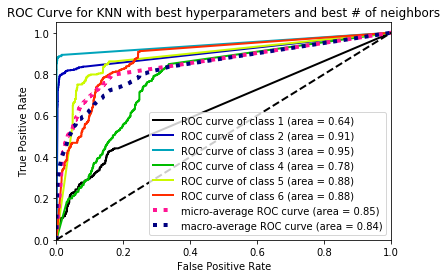

In [36]:
y_prob_dis = KNN_Best_n.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_prob_dis)
plt.title('ROC Curve for KNN with best hyperparameters and best # of neighbors')
plt.show()

# Applying PCA to the Best model from GridSearchCV for KNN.

In [37]:
warnings.simplefilter('ignore') # hides the warnings.

n_components = [1,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,80,84,88,92,96,100] # number of Principal Components
KNN_PCA_Error_Array = []

for n in n_components:        
    # PCA with n principal components
    pca = PCA(n_components = n)
    
    # n principal components
    X_train_PCA_KNN = pca.fit_transform(X_train)
    X_test_PCA_KNN = pca.transform(X_test)
    
    # applying best bodel with n principal component
    KNN_PCA = KNeighborsClassifier(n_neighbors = n_neighbor[idx_1], algorithm = gcv_KNN_parameters['algorithm'],
                                    weights = gcv_KNN_parameters['weights'], metric = gcv_KNN_parameters['metric'])

    KNN_PCA.fit(X_train_PCA_KNN, y_train)
    
    # predicting the class with n principal components
    y_pred_PCA_KNN = KNN_PCA.predict(X_test_PCA_KNN)
    
    # Test Accuracy of the best gridsearchcv model with n principal components
    PCA_KNN_Test_Accuracy = (accuracy_score(y_test, y_pred_PCA_KNN))*100
    PCA_KNN_Test_Accuracy = round(PCA_KNN_Test_Accuracy,4)
    
    # Test Error of the best gridsearchcv model with n principal components
    PCA_KNN_Test_Error = 100 - PCA_KNN_Test_Accuracy
    PCA_KNN_Test_Error = round(PCA_KNN_Test_Error,4)
    KNN_PCA_Error_Array.append(PCA_KNN_Test_Error)
    
    # printing accuracy for n principal components.
    print(f'Test Accuracy of the Model with {n} Principal Components is {PCA_KNN_Test_Accuracy}%.')

# gettint the index of the lowest error from the error array
idx_2 = KNN_PCA_Error_Array.index(min(KNN_PCA_Error_Array))
print (f'Lowest Error is {min(KNN_PCA_Error_Array)} % for {n_components[idx_2]} Principal Components.')

Test Accuracy of the Model with 1 Principal Components is 22.4167%.
Test Accuracy of the Model with 4 Principal Components is 41.7222%.
Test Accuracy of the Model with 8 Principal Components is 55.9444%.
Test Accuracy of the Model with 12 Principal Components is 59.3611%.
Test Accuracy of the Model with 16 Principal Components is 62.4722%.
Test Accuracy of the Model with 20 Principal Components is 62.9444%.
Test Accuracy of the Model with 24 Principal Components is 63.4167%.
Test Accuracy of the Model with 28 Principal Components is 63.75%.
Test Accuracy of the Model with 32 Principal Components is 63.7778%.
Test Accuracy of the Model with 36 Principal Components is 64.3056%.
Test Accuracy of the Model with 40 Principal Components is 64.3333%.
Test Accuracy of the Model with 44 Principal Components is 64.4167%.
Test Accuracy of the Model with 48 Principal Components is 64.3611%.
Test Accuracy of the Model with 52 Principal Components is 64.3611%.
Test Accuracy of the Model with 56 Prin

# Plotting Number of Components vr. Test Error for KNN.

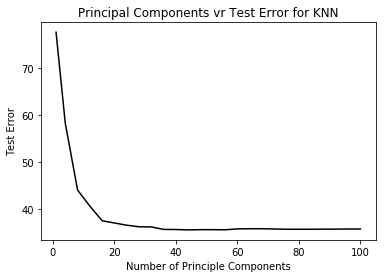

In [38]:
plt.plot(n_components, KNN_PCA_Error_Array, color ="k")

plt.title('Principal Components vr Test Error for KNN')
plt.xlabel('Number of Principle Components')
plt.ylabel('Test Error')
plt.show()

# Model with best Number of Principal Components and best Hyperparameters for KNN.

In [39]:
# PCA with best numbers of principal components.
best_pca = PCA(n_components = n_components[idx_2])

# Transforming the features
X_train_Best_PCA_KNN = best_pca.fit_transform(X_train)
X_test_Best_PCA_KNN = best_pca.transform(X_test)

# applying best bodel with best numbers of principal components
KNN_Best_PCA = KNeighborsClassifier(n_neighbors = n_neighbor[idx_1], algorithm = gcv_KNN_parameters['algorithm'],
                                    weights = gcv_KNN_parameters['weights'], metric = gcv_KNN_parameters['metric'])
KNN_Best_PCA.fit(X_train_Best_PCA_KNN, y_train)

# predicting the class with best numbers of principal components
y_pred_KNN_Best_PCA = KNN_Best_PCA.predict(X_test_Best_PCA_KNN)

# Test Accuracy of the best gridsearchcv model with best numbers of principal components
Best_PCA_Test_Accuracy = (accuracy_score(y_test, y_pred_KNN_Best_PCA))*100
Best_PCA_Test_Accuracy = round(Best_PCA_Test_Accuracy,4)

# Test Error of the best gridsearchcv model with best numbers of principal components
Best_PCA_Test_Error = 100 - Best_PCA_Test_Accuracy
Best_PCA_Test_Error =round(Best_PCA_Test_Error,4)

# printing accuracy for best numbers of principal components.
print(f'Test accuracy of the Model with {n_components[idx_2]} Principal Components is {Best_PCA_Test_Accuracy}%.')

Test accuracy of the Model with 44 Principal Components is 64.4167%.


# Classification Report

In [40]:
print(classification_report(y_test, y_pred_KNN_Best_PCA, labels=[1, 2, 3, 4, 5, 6]))

              precision    recall  f1-score   support

           1       0.51      0.22      0.30       600
           2       0.95      0.80      0.86       600
           3       1.00      0.85      0.92       600
           4       0.38      0.46      0.42       600
           5       0.63      0.79      0.70       600
           6       0.54      0.75      0.63       600

   micro avg       0.64      0.64      0.64      3600
   macro avg       0.67      0.64      0.64      3600
weighted avg       0.67      0.64      0.64      3600



# Presision, Recall, Accuracy, Confusion Matrix and ROC Curve for the above model.

In [41]:
precision,recall,fscore,support = score(y_test, y_pred_KNN_Best_PCA, average = 'weighted')
print(f'Precision : {(round(precision,4))*100}% / Recall : {(round(recall,4))*100}% / Accuracy : {Best_PCA_Test_Accuracy}%.')

Precision : 66.61% / Recall : 64.42% / Accuracy : 64.4167%.


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_KNN_Best_PCA)

array([[130,   0,   0, 277, 117,  76],
       [  7, 477,   2,  47,  67,   0],
       [  0,  26, 509,   5,  60,   0],
       [ 19,   0,   0, 278,   4, 299],
       [ 92,   0,   0,  22, 473,  13],
       [  8,   0,   0, 110,  30, 452]], dtype=int64)

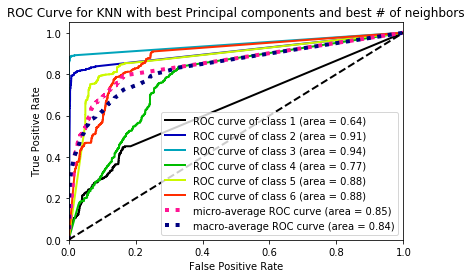

In [43]:
y_prob_dis = KNN_Best_PCA.predict_proba(X_test_Best_PCA_KNN)
skplt.metrics.plot_roc_curve(y_test, y_prob_dis)
plt.title(f'ROC Curve for KNN with best Principal components and best # of neighbors')
plt.show()

# Random Forest.

# Using GridsearchCV to get the best Hyperparameters for Random Forest.

In [44]:
#takes about 5 minutes.
warnings.simplefilter('ignore') #hides the warnings.

RF = RandomForestClassifier(random_state = 42) # Random Forest classifier

RF_parameters = {'criterion': ['entropy','gini'],  # searching for the best parameters using
                 'n_estimators': [20,25,30,35,40], # gridsearchCV with 5 fold cross validation.
                 'bootstrap': [True, False]}

gcv_RF = GridSearchCV(estimator = RF,
                       param_grid = RF_parameters,
                       scoring = 'accuracy',
                       cv = 5,               # k-fold
                       n_jobs = -1,          # using all processors
                       return_train_score=True)   

gcv_RF = gcv_RF.fit(X_train, y_train)

gcv_RF_results = gcv_RF.cv_results_ # results from all the models.

gcv_RF_Train_Accuracy = (gcv_RF.best_score_)*100 # Accuracy of the best model.
gcv_RF_Train_Accuracy = round(gcv_RF_Train_Accuracy,4)

gcv_RF_parameters = gcv_RF.best_params_ # Hyperparameters associated to the best model

print(f'Best Training Accuracy is {gcv_RF_Train_Accuracy}% for {gcv_RF_parameters} as hyperparameter.')

Best Training Accuracy is 93.2687% for {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 35} as hyperparameter.


In [45]:
gcv_RF_parameters

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 35}

# Trying models with different numbers of Trees with best Hyperparameters of Random Forest.

In [46]:
#takes about 3 minutes.
warnings.simplefilter('ignore') #hides the warning

RF_n_est_Error_array = []
n_estimators = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100] # numbers of Trees

for n in n_estimators:
    # Random Forest with n Trees
    RF = RandomForestClassifier(random_state = 42, n_estimators = n,
                                criterion = gcv_RF_parameters['criterion'], bootstrap = gcv_RF_parameters['bootstrap'])
    
    RF.fit(X_train, y_train)
    
    RF_y_pred = RF.predict(X_test)
    
    # Test Accuracy for n Trees
    RF_Test_Accuracy = (accuracy_score(y_test, RF_y_pred))*100
    RF_Test_Accuracy = round(RF_Test_Accuracy,4)
    
    # Test Error for n Trees
    RF_Test_Error = 100 - RF_Test_Accuracy
    RF_Test_Error = round(RF_Test_Error,4)
    RF_n_est_Error_array.append(RF_Test_Error)
    
    # printing Test Accuracy for n Trees
    print(f'Test Accuracy for {n} trees is {RF_Test_Accuracy}%.')

# getting the index of the lowest error from the error array
idx_3 = RF_n_est_Error_array.index(min(RF_n_est_Error_array))
print (f'Lowest Error is {min(RF_n_est_Error_array)}% for {n_estimators[idx_3]} Trees')

Test Accuracy for 5 trees is 54.2222%.
Test Accuracy for 10 trees is 58.1944%.
Test Accuracy for 15 trees is 57.25%.
Test Accuracy for 20 trees is 58.0556%.
Test Accuracy for 25 trees is 58.4167%.
Test Accuracy for 30 trees is 58.7222%.
Test Accuracy for 35 trees is 59.7778%.
Test Accuracy for 40 trees is 60.5278%.
Test Accuracy for 45 trees is 60.1389%.
Test Accuracy for 50 trees is 60.8611%.
Test Accuracy for 55 trees is 60.8889%.
Test Accuracy for 60 trees is 61.6111%.
Test Accuracy for 65 trees is 61.7222%.
Test Accuracy for 70 trees is 61.2222%.
Test Accuracy for 75 trees is 60.8056%.
Test Accuracy for 80 trees is 60.6944%.
Test Accuracy for 85 trees is 60.3889%.
Test Accuracy for 90 trees is 60.8056%.
Test Accuracy for 95 trees is 60.3611%.
Test Accuracy for 100 trees is 60.6667%.
Lowest Error is 38.2778% for 65 Trees


# Plotting Numbers of Trees vr. Test Error for Random Forest.

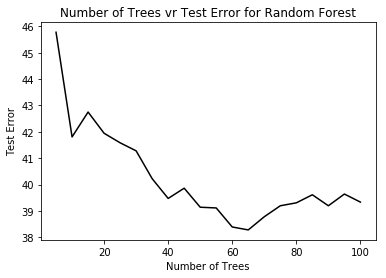

In [47]:
plt.plot(n_estimators, RF_n_est_Error_array, color ="k")

plt.title('Number of Trees vr Test Error for Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Test Error')
plt.show()

# Taking Best Hyperparameters and best Numbers of Trees for Random Forest.

In [48]:
# training again with the best number of Trees
RF_Best_n = RandomForestClassifier(random_state = 42, n_estimators = n_estimators[idx_3],
                                   criterion = gcv_RF_parameters['criterion'], bootstrap = gcv_RF_parameters['bootstrap'])
RF_Best_n.fit(X_train, y_train)

RF_Best_n_y_pred = RF_Best_n.predict(X_test)

# Test Accuracy for best numbers of Trees
RF_Best_n_Test_Accuracy = (accuracy_score(y_test, RF_Best_n_y_pred))*100
RF_Best_n_Test_Accuracy = round(RF_Best_n_Test_Accuracy,4)

# Test Error for best numbers of Trees
RF_Best_n_Test_Error = 100 - RF_Best_n_Test_Accuracy
RF_Best_n_Test_Error = round(RF_Best_n_Test_Error,4)

print (f'Test Accuracy for the best model from GridsearchCV and with best numbers of trees is {RF_Best_n_Test_Accuracy}%..')

Test Accuracy for the best model from GridsearchCV and with best numbers of trees is 61.7222%..


# Classification Report

In [49]:
print(classification_report(y_test, RF_Best_n_y_pred, labels=[1, 2, 3, 4, 5, 6]))

              precision    recall  f1-score   support

           1       0.70      0.42      0.52       600
           2       0.56      0.67      0.61       600
           3       0.80      0.54      0.64       600
           4       0.48      0.70      0.57       600
           5       0.73      0.77      0.75       600
           6       0.60      0.60      0.60       600

   micro avg       0.62      0.62      0.62      3600
   macro avg       0.64      0.62      0.62      3600
weighted avg       0.64      0.62      0.62      3600



# Presision, Recall, Accuracy, Confusion Matrix and ROC Curve for Random Forest.

In [50]:
precision,recall,fscore,support = score(y_test, RF_Best_n_y_pred, average = 'weighted')
print(f'Precision : {(round(precision,4))*100}% / Recall : {(round(recall,4))*100}% / Accuracy : {RF_Best_n_Test_Accuracy}%')

Precision : 64.31% / Recall : 61.72% / Accuracy : 61.7222%


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, RF_Best_n_y_pred)

array([[252,   0,   0, 137, 128,  83],
       [ 15, 402,  58,  94,  31,   0],
       [ 20, 248, 323,   1,   8,   0],
       [ 32,   0,   0, 422,   1, 145],
       [ 38,  66,   4,  13, 464,  15],
       [  5,   8,  21, 204,   3, 359]], dtype=int64)

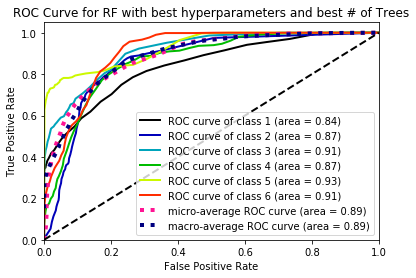

In [52]:
y_prob_dis = RF_Best_n.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_prob_dis)
plt.title('ROC Curve for RF with best hyperparameters and best # of Trees')
plt.show()

# Applying PCA to the Best model from GridSearchCV of Random Forest.

In [53]:
#time for this cell depends on the numbers of trees we get from above 
#took about 3 minutes when number of trees was 65

warnings.simplefilter('ignore') # hides the warnings

n_components = [1,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,80,84,88,92,96,100] # number of Principal Components
RF_PCA_Error_Array = []

for n in n_components:
    # PCA with n principal components
    pca = PCA(n_components = n)
    
    # n principal components
    X_train_PCA_RF = pca.fit_transform(X_train)
    X_test_PCA_RF = pca.transform(X_test)
    
    # applying best bodel with n principal component
    RF_PCA = RandomForestClassifier(random_state = 42, n_estimators = n_estimators[idx_3],
                                    criterion = gcv_RF_parameters['criterion'], bootstrap = gcv_RF_parameters['bootstrap'])
    RF_PCA.fit(X_train_PCA_RF, y_train)
    
    # predicting the class with n principal components
    y_pred_PCA_RF = RF_PCA.predict(X_test_PCA_RF)
    
    # Test Accuracy of the best gridsearchcv model with n principal components
    PCA_RF_Test_Accuracy = (accuracy_score(y_test, y_pred_PCA_RF))*100
    PCA_RF_Test_Accuracy = round(PCA_RF_Test_Accuracy,4)
    
    # Test Error of the best gridsearchcv model with n principal components
    PCA_RF_Test_Error = 100 - PCA_RF_Test_Accuracy
    PCA_RF_Test_Error = round(PCA_RF_Test_Error,4)
    RF_PCA_Error_Array.append(PCA_RF_Test_Error)
    
    # printing accuracy for n principal components    
    print(f'Test Accuracy of the Model with {n} Principal Components is {PCA_RF_Test_Accuracy}%.')

# gettint the index of the lowest error from the error array
idx_4 = RF_PCA_Error_Array.index(min(RF_PCA_Error_Array))
print (f'Lowest Error is {min(RF_PCA_Error_Array)} % for {n_components[idx_4]} Principal Components.')

Test Accuracy of the Model with 1 Principal Components is 22.3333%.
Test Accuracy of the Model with 4 Principal Components is 43.7222%.
Test Accuracy of the Model with 8 Principal Components is 50.1667%.
Test Accuracy of the Model with 12 Principal Components is 55.8333%.
Test Accuracy of the Model with 16 Principal Components is 57.6389%.
Test Accuracy of the Model with 20 Principal Components is 59.1667%.
Test Accuracy of the Model with 24 Principal Components is 61.8056%.
Test Accuracy of the Model with 28 Principal Components is 63.8889%.
Test Accuracy of the Model with 32 Principal Components is 61.3056%.
Test Accuracy of the Model with 36 Principal Components is 62.75%.
Test Accuracy of the Model with 40 Principal Components is 61.5833%.
Test Accuracy of the Model with 44 Principal Components is 64.1667%.
Test Accuracy of the Model with 48 Principal Components is 63.6111%.
Test Accuracy of the Model with 52 Principal Components is 57.6667%.
Test Accuracy of the Model with 56 Prin

# Plotting Number of Components vr. Test Error for Random Forest.

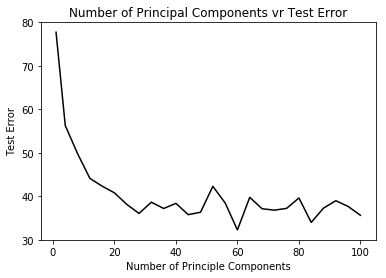

In [54]:
plt.plot(n_components, RF_PCA_Error_Array, color ="k")

plt.title('Number of Principal Components vr Test Error')
plt.xlabel('Number of Principle Components')
plt.ylabel('Test Error')
plt.show()

# Model with best Number of Principal Components and best Hyperparameters for Random Forest.

In [64]:
# PCA with best numbers of principal components.
best_pca = PCA(n_components = n_components[idx_4])

# Transforming the features
X_train_Best_PCA_RF = best_pca.fit_transform(X_train)
X_test_Best_PCA_RF = best_pca.transform(X_test)

# applying best bodel with best numbers of principal components
RF_Best_PCA = RandomForestClassifier(random_state = 42, n_estimators = n_estimators[idx_3],
                                     criterion = gcv_RF_parameters['criterion'], bootstrap = gcv_RF_parameters['bootstrap'])
RF_Best_PCA.fit(X_train_Best_PCA_RF, y_train)

# predicting the class with best numbers of principal components
y_pred_RF_Best_PCA = RF_Best_PCA.predict(X_test_Best_PCA_RF)

# Test Accuracy of the best gridsearchcv model with best numbers of principal components
Best_PCA_Test_Accuracy = (accuracy_score(y_test, y_pred_RF_Best_PCA))*100
Best_PCA_Test_Accuracy = round(Best_PCA_Test_Accuracy,4)

# Test Error of the best gridsearchcv model with best numbers of principal components
Best_PCA_Test_Error = 100 - Best_PCA_Test_Accuracy
Best_PCA_Test_Error =round(Best_PCA_Test_Error,4)

# printing accuracy for best numbers of principal components.
print(f'Test accuracy of the Model with {n_components[idx_4]} Principal Components is {Best_PCA_Test_Accuracy}%.')

Test accuracy of the Model with 60 Principal Components is 66.3056%.


# Classification Report

In [56]:
print(classification_report(y_test, y_pred_RF_Best_PCA, labels=[1, 2, 3, 4, 5, 6]))

              precision    recall  f1-score   support

           1       0.45      0.69      0.55       600
           2       0.82      0.83      0.82       600
           3       1.00      0.63      0.77       600
           4       0.50      0.38      0.43       600
           5       0.62      0.76      0.68       600
           6       0.55      0.46      0.50       600

   micro avg       0.62      0.62      0.62      3600
   macro avg       0.66      0.62      0.63      3600
weighted avg       0.66      0.62      0.63      3600



# Presision, Recall, Accuracy, Confusion Matrix and ROC Curve for the above model.

In [57]:
precision,recall,fscore,support = score(y_test, y_pred_RF_Best_PCA, average = 'weighted')
print(f'Precision : {(round(precision,4))*100}% / Recall : {(round(recall,4))*100}% / Accuracy : {Best_PCA_Test_Accuracy}%.')

Precision : 65.52% / Recall : 62.470000000000006% / Accuracy : 62.4722%.


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_RF_Best_PCA)

array([[413,   0,   0,  38,  88,  61],
       [  2, 496,   1,  23,  77,   1],
       [ 43, 107, 380,  21,  37,  12],
       [236,   0,   0, 227,  31, 106],
       [ 81,   1,   0,  11, 458,  49],
       [137,   0,   0, 136,  52, 275]], dtype=int64)

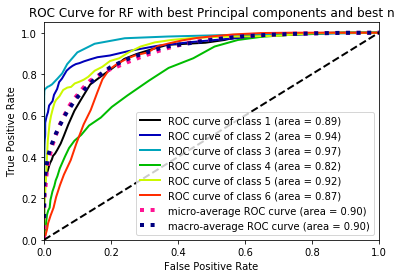

In [59]:
y_prob_dis = RF_Best_PCA.predict_proba(X_test_Best_PCA_RF)
skplt.metrics.plot_roc_curve(y_test, y_prob_dis)
plt.title(f'ROC Curve for RF with best Principal components and best n')
plt.show()